In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 200
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

  0%|          | 0/117 [00:00<?, ?it/s]

118it [00:09, 12.10it/s]                         


Epoch 1 of 200
Generator loss: 1.39887763, Discriminator loss: 0.91115918


118it [00:09, 12.05it/s]                         


Epoch 2 of 200
Generator loss: 3.02071843, Discriminator loss: 1.20422391


118it [00:09, 12.15it/s]                         


Epoch 3 of 200
Generator loss: 5.25612879, Discriminator loss: 0.62001901


118it [00:09, 12.15it/s]                         


Epoch 4 of 200
Generator loss: 2.36395194, Discriminator loss: 1.02371942


118it [00:09, 12.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


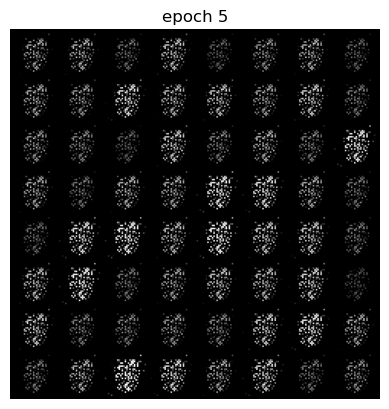

Epoch 5 of 200
Generator loss: 2.35399158, Discriminator loss: 0.87604476


118it [00:09, 12.01it/s]                         


Epoch 6 of 200
Generator loss: 2.38742339, Discriminator loss: 0.79289106


118it [00:09, 12.10it/s]                         


Epoch 7 of 200
Generator loss: 3.13689345, Discriminator loss: 0.79181777


118it [00:09, 12.05it/s]                         


Epoch 8 of 200
Generator loss: 2.17786632, Discriminator loss: 1.19930102


118it [00:09, 12.17it/s]                         


Epoch 9 of 200
Generator loss: 2.17658346, Discriminator loss: 0.98465993


118it [00:09, 12.16it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


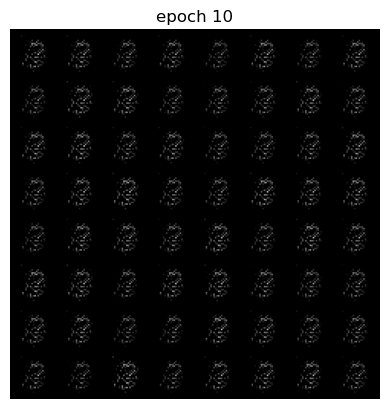

Epoch 10 of 200
Generator loss: 2.03304189, Discriminator loss: 1.11119874


118it [00:09, 12.13it/s]                         


Epoch 11 of 200
Generator loss: 2.19363256, Discriminator loss: 0.90466325


118it [00:09, 12.14it/s]                         


Epoch 12 of 200
Generator loss: 1.36050845, Discriminator loss: 1.05573498


118it [00:09, 12.10it/s]                         


Epoch 13 of 200
Generator loss: 1.30873458, Discriminator loss: 1.09822866


118it [00:09, 12.02it/s]                         


Epoch 14 of 200
Generator loss: 1.22634542, Discriminator loss: 1.07980124


118it [00:09, 12.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


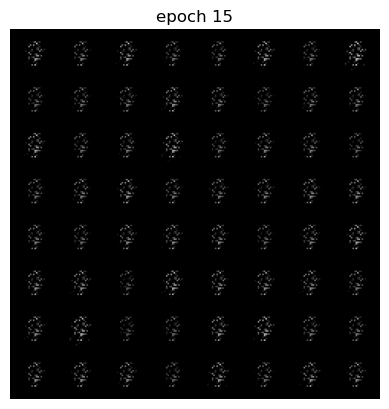

Epoch 15 of 200
Generator loss: 1.97746430, Discriminator loss: 1.11717423


118it [00:09, 12.10it/s]                         


Epoch 16 of 200
Generator loss: 1.34786640, Discriminator loss: 1.10584361


118it [00:09, 12.11it/s]                         


Epoch 17 of 200
Generator loss: 2.18617390, Discriminator loss: 0.77706308


118it [00:09, 12.17it/s]                         


Epoch 18 of 200
Generator loss: 2.31912737, Discriminator loss: 1.16043103


118it [00:09, 12.11it/s]                         


Epoch 19 of 200
Generator loss: 1.98224480, Discriminator loss: 1.19114589


118it [00:09, 12.13it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


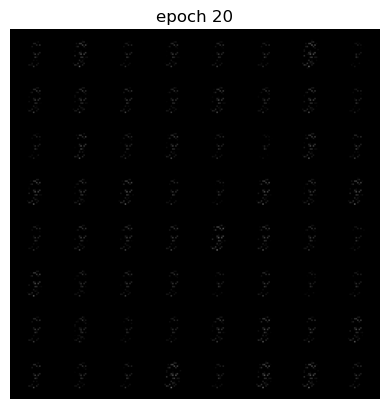

Epoch 20 of 200
Generator loss: 1.80700284, Discriminator loss: 1.01369197


118it [00:09, 11.99it/s]                         


Epoch 21 of 200
Generator loss: 1.39539098, Discriminator loss: 1.00147815


118it [00:09, 12.08it/s]                         


Epoch 22 of 200
Generator loss: 1.69289302, Discriminator loss: 0.85087915


118it [00:09, 12.10it/s]                         


Epoch 23 of 200
Generator loss: 2.38598365, Discriminator loss: 0.66066866


118it [00:09, 12.09it/s]                         


Epoch 24 of 200
Generator loss: 1.96636686, Discriminator loss: 0.92668065


118it [00:09, 12.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


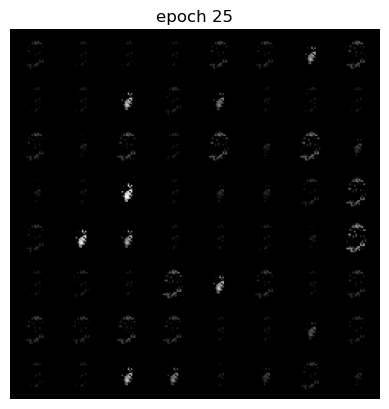

Epoch 25 of 200
Generator loss: 1.85496214, Discriminator loss: 0.81086807


118it [00:09, 12.29it/s]                         


Epoch 26 of 200
Generator loss: 2.28807015, Discriminator loss: 0.70433784


118it [00:09, 12.12it/s]                         


Epoch 27 of 200
Generator loss: 2.84048590, Discriminator loss: 0.62519878


118it [00:09, 12.23it/s]                         


Epoch 28 of 200
Generator loss: 2.42171809, Discriminator loss: 0.55761747


118it [00:09, 12.19it/s]                         


Epoch 29 of 200
Generator loss: 2.64190546, Discriminator loss: 0.48203443


118it [00:09, 12.23it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


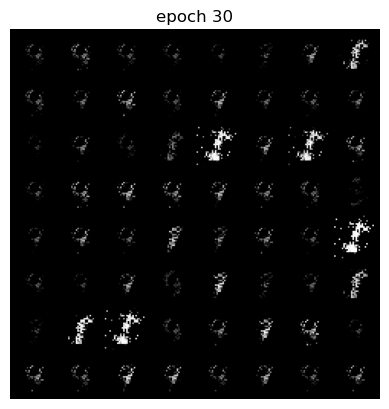

Epoch 30 of 200
Generator loss: 2.72639834, Discriminator loss: 0.90589073


118it [00:09, 12.28it/s]                         


Epoch 31 of 200
Generator loss: 1.97010251, Discriminator loss: 0.72456444


118it [00:09, 12.33it/s]                         


Epoch 32 of 200
Generator loss: 2.32435119, Discriminator loss: 0.67290607


118it [00:09, 12.28it/s]                         


Epoch 33 of 200
Generator loss: 3.06225483, Discriminator loss: 0.50666833


118it [00:09, 12.40it/s]                         


Epoch 34 of 200
Generator loss: 2.70422617, Discriminator loss: 0.51304836


118it [00:09, 12.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


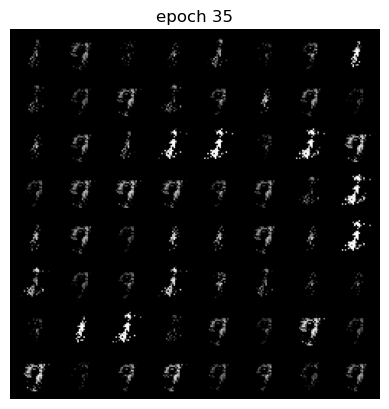

Epoch 35 of 200
Generator loss: 1.97306471, Discriminator loss: 0.78934186


118it [00:09, 12.40it/s]                         


Epoch 36 of 200
Generator loss: 2.41088487, Discriminator loss: 0.68175131


118it [00:09, 12.39it/s]                         


Epoch 37 of 200
Generator loss: 2.67508521, Discriminator loss: 0.70629958


118it [00:09, 12.36it/s]                         


Epoch 38 of 200
Generator loss: 2.71713594, Discriminator loss: 0.51053151


118it [00:09, 12.24it/s]                         


Epoch 39 of 200
Generator loss: 2.35310103, Discriminator loss: 0.67574789


118it [00:09, 12.32it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


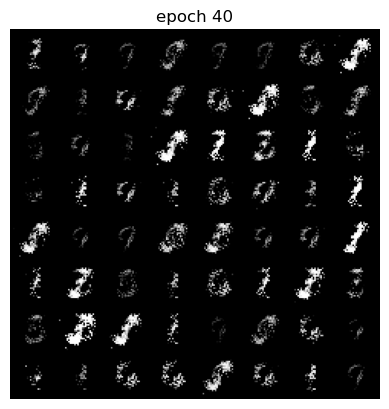

Epoch 40 of 200
Generator loss: 2.93337768, Discriminator loss: 0.51117204


118it [00:09, 12.32it/s]                         


Epoch 41 of 200
Generator loss: 2.64203963, Discriminator loss: 0.57027407


118it [00:09, 12.33it/s]                         


Epoch 42 of 200
Generator loss: 2.54138830, Discriminator loss: 0.65207404


118it [00:09, 12.32it/s]                         


Epoch 43 of 200
Generator loss: 2.36838149, Discriminator loss: 0.71739497


118it [00:09, 12.41it/s]                         


Epoch 44 of 200
Generator loss: 2.52416219, Discriminator loss: 0.66441619


118it [00:09, 12.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


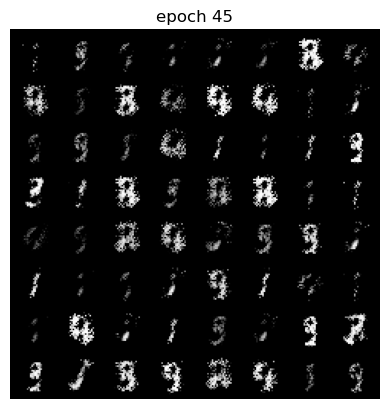

Epoch 45 of 200
Generator loss: 2.47355938, Discriminator loss: 0.62414464


118it [00:09, 12.36it/s]                         


Epoch 46 of 200
Generator loss: 2.70904393, Discriminator loss: 0.57684744


118it [00:09, 12.38it/s]                         


Epoch 47 of 200
Generator loss: 2.34594929, Discriminator loss: 0.74979821


118it [00:09, 12.39it/s]                         


Epoch 48 of 200
Generator loss: 2.43545535, Discriminator loss: 0.56289205


118it [00:09, 12.35it/s]                         


Epoch 49 of 200
Generator loss: 2.86872903, Discriminator loss: 0.51317227


118it [00:09, 12.40it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


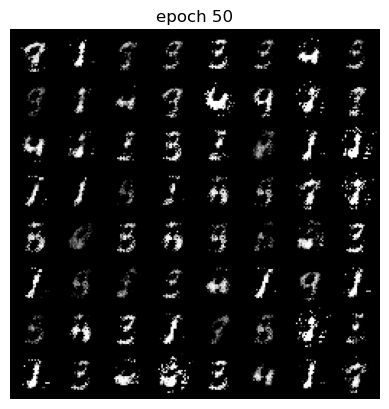

Epoch 50 of 200
Generator loss: 2.78512153, Discriminator loss: 0.55352520


118it [00:09, 12.27it/s]                         


Epoch 51 of 200
Generator loss: 2.71679402, Discriminator loss: 0.59734542


118it [00:09, 12.35it/s]                         


Epoch 52 of 200
Generator loss: 3.03796397, Discriminator loss: 0.44933999


118it [00:09, 12.37it/s]                         


Epoch 53 of 200
Generator loss: 2.92988072, Discriminator loss: 0.53439080


118it [00:09, 12.41it/s]                         


Epoch 54 of 200
Generator loss: 2.45602018, Discriminator loss: 0.68200965


118it [00:09, 12.39it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


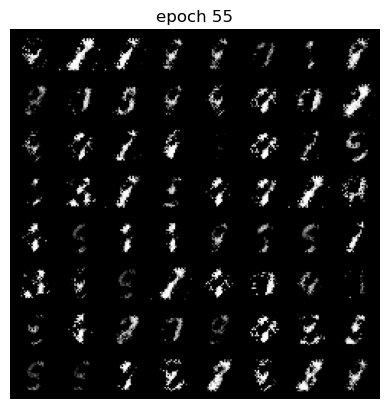

Epoch 55 of 200
Generator loss: 2.43056574, Discriminator loss: 0.66834795


118it [00:09, 12.37it/s]                         


Epoch 56 of 200
Generator loss: 2.43286166, Discriminator loss: 0.64540065


118it [00:09, 12.27it/s]                         


Epoch 57 of 200
Generator loss: 2.64422682, Discriminator loss: 0.57850908


118it [00:09, 12.33it/s]                         


Epoch 58 of 200
Generator loss: 2.65768202, Discriminator loss: 0.58018753


118it [00:09, 12.34it/s]                         


Epoch 59 of 200
Generator loss: 2.64488541, Discriminator loss: 0.61352528


118it [00:09, 12.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


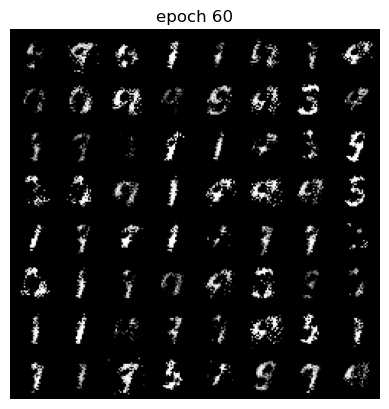

Epoch 60 of 200
Generator loss: 2.76173279, Discriminator loss: 0.62717878


118it [00:09, 12.31it/s]                         


Epoch 61 of 200
Generator loss: 2.44314120, Discriminator loss: 0.70724473


118it [00:09, 12.28it/s]                         


Epoch 62 of 200
Generator loss: 2.26250228, Discriminator loss: 0.65536906


118it [00:09, 12.36it/s]                         


Epoch 63 of 200
Generator loss: 2.52399439, Discriminator loss: 0.61841625


118it [00:09, 12.21it/s]                         


Epoch 64 of 200
Generator loss: 2.66380294, Discriminator loss: 0.56529510


118it [00:09, 12.31it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


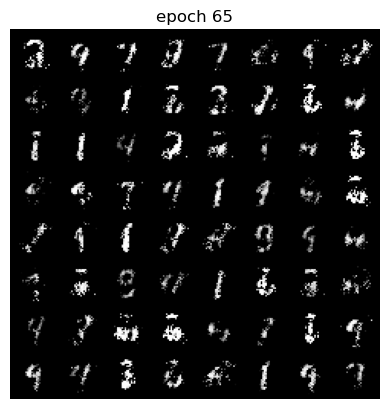

Epoch 65 of 200
Generator loss: 2.33963325, Discriminator loss: 0.68863709


118it [00:09, 12.30it/s]                         


Epoch 66 of 200
Generator loss: 2.22740826, Discriminator loss: 0.72730343


118it [00:09, 12.27it/s]                         


Epoch 67 of 200
Generator loss: 2.52540496, Discriminator loss: 0.67311862


118it [00:09, 12.32it/s]                         


Epoch 68 of 200
Generator loss: 2.32205437, Discriminator loss: 0.68531815


118it [00:09, 12.30it/s]                         


Epoch 69 of 200
Generator loss: 2.55800553, Discriminator loss: 0.66465547


118it [00:09, 12.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


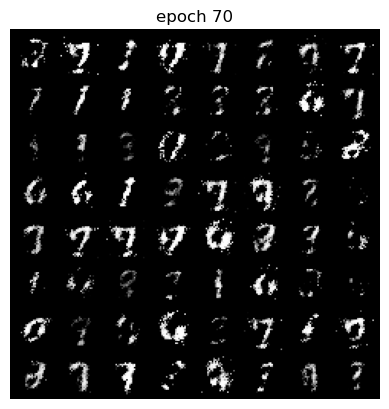

Epoch 70 of 200
Generator loss: 2.27086827, Discriminator loss: 0.67848181


118it [00:09, 12.37it/s]                         


Epoch 71 of 200
Generator loss: 2.50902572, Discriminator loss: 0.63145032


118it [00:09, 12.37it/s]                         


Epoch 72 of 200
Generator loss: 2.48529270, Discriminator loss: 0.64811088


118it [00:09, 12.34it/s]                         


Epoch 73 of 200
Generator loss: 2.31423810, Discriminator loss: 0.72241943


118it [00:09, 12.34it/s]                         


Epoch 74 of 200
Generator loss: 2.20943925, Discriminator loss: 0.72165313


118it [00:09, 12.35it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


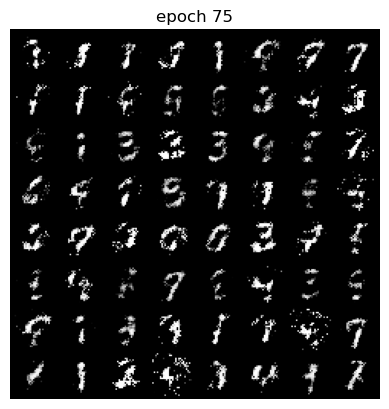

Epoch 75 of 200
Generator loss: 2.44391720, Discriminator loss: 0.69895777


118it [00:09, 12.30it/s]                         


Epoch 76 of 200
Generator loss: 2.62700306, Discriminator loss: 0.64673517


118it [00:09, 12.39it/s]                         


Epoch 77 of 200
Generator loss: 2.52554505, Discriminator loss: 0.67140383


118it [00:09, 12.41it/s]                         


Epoch 78 of 200
Generator loss: 2.48171980, Discriminator loss: 0.72121669


118it [00:09, 12.41it/s]                         


Epoch 79 of 200
Generator loss: 2.53507908, Discriminator loss: 0.65290760


118it [00:09, 12.48it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


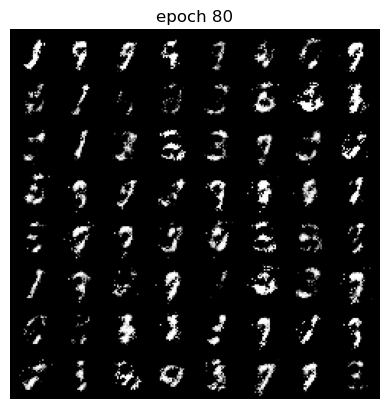

Epoch 80 of 200
Generator loss: 2.43173299, Discriminator loss: 0.67109810


118it [00:09, 12.43it/s]                         


Epoch 81 of 200
Generator loss: 2.29518481, Discriminator loss: 0.69872973


118it [00:09, 12.35it/s]                         


Epoch 82 of 200
Generator loss: 2.23391226, Discriminator loss: 0.69939317


118it [00:09, 12.44it/s]                         


Epoch 83 of 200
Generator loss: 2.29523723, Discriminator loss: 0.74208662


118it [00:09, 12.45it/s]                         


Epoch 84 of 200
Generator loss: 2.31779769, Discriminator loss: 0.68180120


118it [00:09, 12.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


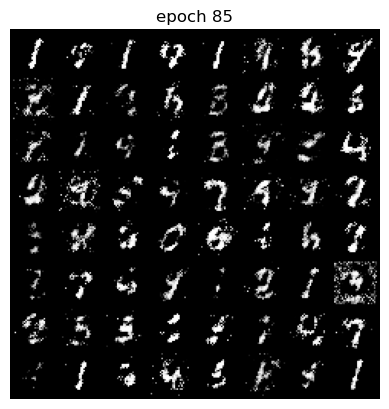

Epoch 85 of 200
Generator loss: 2.25407777, Discriminator loss: 0.72244248


118it [00:09, 12.41it/s]                         


Epoch 86 of 200
Generator loss: 2.28462166, Discriminator loss: 0.73488703


118it [00:09, 12.46it/s]                         


Epoch 87 of 200
Generator loss: 1.96930313, Discriminator loss: 0.83665582


118it [00:09, 12.44it/s]                         


Epoch 88 of 200
Generator loss: 2.04230104, Discriminator loss: 0.76644782


118it [00:09, 12.37it/s]                         


Epoch 89 of 200
Generator loss: 2.15578587, Discriminator loss: 0.77038259


118it [00:09, 12.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


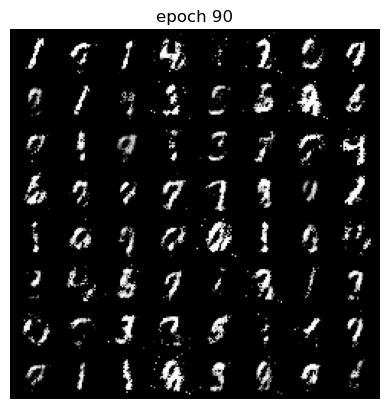

Epoch 90 of 200
Generator loss: 2.25736354, Discriminator loss: 0.71907707


118it [00:09, 12.40it/s]                         


Epoch 91 of 200
Generator loss: 2.23542625, Discriminator loss: 0.69681203


118it [00:09, 12.21it/s]                         


Epoch 92 of 200
Generator loss: 2.17416173, Discriminator loss: 0.74505372


118it [00:09, 12.25it/s]                         


Epoch 93 of 200
Generator loss: 1.99108646, Discriminator loss: 0.79320777


118it [00:09, 12.35it/s]                         


Epoch 94 of 200
Generator loss: 2.13417467, Discriminator loss: 0.73956735


118it [00:09, 12.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


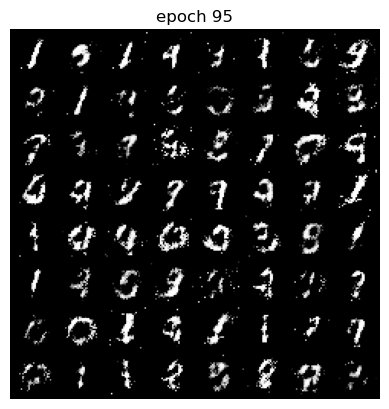

Epoch 95 of 200
Generator loss: 2.11166098, Discriminator loss: 0.79431681


118it [00:09, 12.49it/s]                         


Epoch 96 of 200
Generator loss: 2.11961677, Discriminator loss: 0.77167833


118it [00:09, 12.53it/s]                         


Epoch 97 of 200
Generator loss: 2.17249354, Discriminator loss: 0.74626683


118it [00:09, 12.56it/s]                         


Epoch 98 of 200
Generator loss: 2.16775055, Discriminator loss: 0.77414807


118it [00:09, 12.46it/s]                         


Epoch 99 of 200
Generator loss: 2.07098150, Discriminator loss: 0.78178513


118it [00:09, 12.46it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


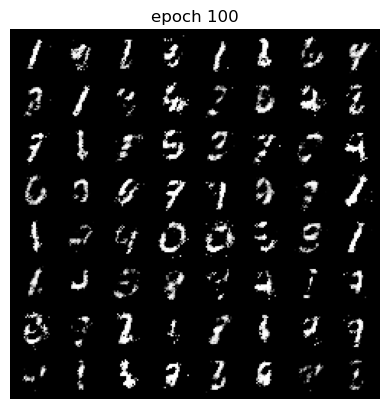

Epoch 100 of 200
Generator loss: 1.99342912, Discriminator loss: 0.80326302


118it [00:09, 12.40it/s]                         


Epoch 101 of 200
Generator loss: 1.91042769, Discriminator loss: 0.81354647


118it [00:09, 12.34it/s]                         


Epoch 102 of 200
Generator loss: 2.01463111, Discriminator loss: 0.79634491


118it [00:09, 12.38it/s]                         


Epoch 103 of 200
Generator loss: 2.07188208, Discriminator loss: 0.78975417


118it [00:09, 12.39it/s]                         


Epoch 104 of 200
Generator loss: 1.86501109, Discriminator loss: 0.85434400


118it [00:09, 12.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


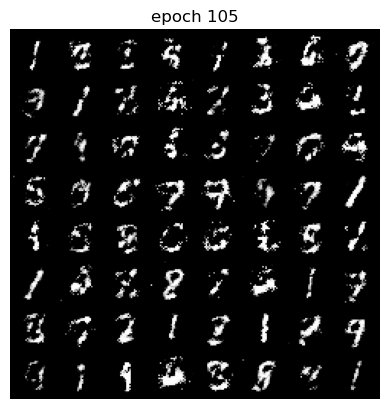

Epoch 105 of 200
Generator loss: 1.93210277, Discriminator loss: 0.84014984


118it [00:09, 12.47it/s]                         


Epoch 106 of 200
Generator loss: 1.82202340, Discriminator loss: 0.86583286


118it [00:09, 12.58it/s]                         


Epoch 107 of 200
Generator loss: 1.97234431, Discriminator loss: 0.81487056


118it [00:09, 12.62it/s]                         


Epoch 108 of 200
Generator loss: 2.04263289, Discriminator loss: 0.80804152


118it [00:09, 12.51it/s]                         


Epoch 109 of 200
Generator loss: 1.92297720, Discriminator loss: 0.84021884


118it [00:09, 12.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


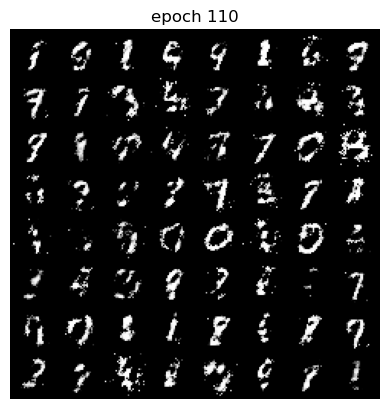

Epoch 110 of 200
Generator loss: 1.75749063, Discriminator loss: 0.87804861


118it [00:09, 12.47it/s]                         


Epoch 111 of 200
Generator loss: 1.85122160, Discriminator loss: 0.84631762


118it [00:09, 12.41it/s]                         


Epoch 112 of 200
Generator loss: 1.95920384, Discriminator loss: 0.80805771


118it [00:09, 12.52it/s]                         


Epoch 113 of 200
Generator loss: 2.01169687, Discriminator loss: 0.79898547


118it [00:09, 12.56it/s]                         


Epoch 114 of 200
Generator loss: 2.01755142, Discriminator loss: 0.78696010


118it [00:09, 12.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


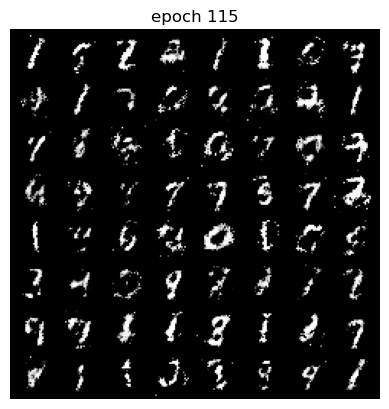

Epoch 115 of 200
Generator loss: 1.86470882, Discriminator loss: 0.83617460


118it [00:09, 12.56it/s]                         


Epoch 116 of 200
Generator loss: 1.84290442, Discriminator loss: 0.88229591


118it [00:09, 12.46it/s]                         


Epoch 117 of 200
Generator loss: 1.84983022, Discriminator loss: 0.86132486


118it [00:09, 12.49it/s]                         


Epoch 118 of 200
Generator loss: 1.77238282, Discriminator loss: 0.84946555


118it [00:09, 12.48it/s]                         


Epoch 119 of 200
Generator loss: 1.85224640, Discriminator loss: 0.84841472


118it [00:09, 12.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


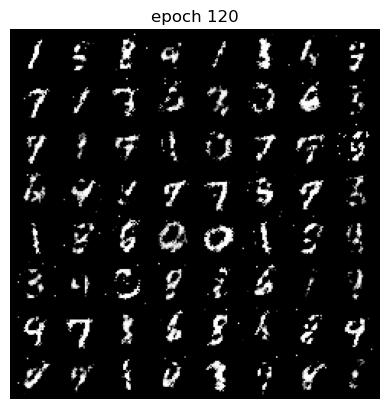

Epoch 120 of 200
Generator loss: 1.87723244, Discriminator loss: 0.88026861


118it [00:09, 12.50it/s]                         


Epoch 121 of 200
Generator loss: 1.71119063, Discriminator loss: 0.89259570


118it [00:09, 12.52it/s]                         


Epoch 122 of 200
Generator loss: 1.77443430, Discriminator loss: 0.89403651


118it [00:09, 12.00it/s]                         


Epoch 123 of 200
Generator loss: 1.75705478, Discriminator loss: 0.90080740


118it [00:09, 12.27it/s]                         


Epoch 124 of 200
Generator loss: 1.79426203, Discriminator loss: 0.86763947


118it [00:07, 14.78it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


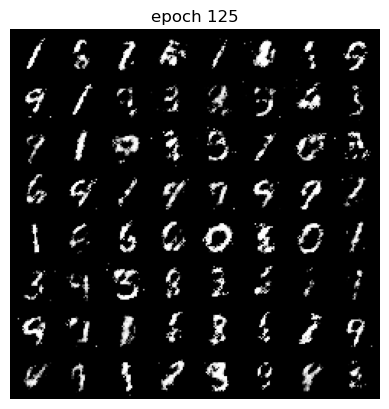

Epoch 125 of 200
Generator loss: 1.81845684, Discriminator loss: 0.87561919


118it [00:07, 14.81it/s]                         


Epoch 126 of 200
Generator loss: 1.70048946, Discriminator loss: 0.91619013


118it [00:07, 15.32it/s]                         


Epoch 127 of 200
Generator loss: 1.73358169, Discriminator loss: 0.89838610


118it [00:07, 15.19it/s]                         


Epoch 128 of 200
Generator loss: 1.71853306, Discriminator loss: 0.90130068


118it [00:07, 15.20it/s]                         


Epoch 129 of 200
Generator loss: 1.76092477, Discriminator loss: 0.90229619


118it [00:07, 15.09it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


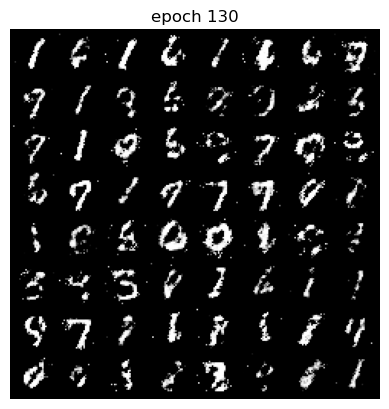

Epoch 130 of 200
Generator loss: 1.78992990, Discriminator loss: 0.91726398


118it [00:07, 15.36it/s]                         


Epoch 131 of 200
Generator loss: 1.70584853, Discriminator loss: 0.89790125


118it [00:07, 15.25it/s]                         


Epoch 132 of 200
Generator loss: 1.66432363, Discriminator loss: 0.92596527


118it [00:07, 15.10it/s]                         


Epoch 133 of 200
Generator loss: 1.65252789, Discriminator loss: 0.92670997


118it [00:07, 15.42it/s]                         


Epoch 134 of 200
Generator loss: 1.60819059, Discriminator loss: 0.93597100


118it [00:07, 15.41it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


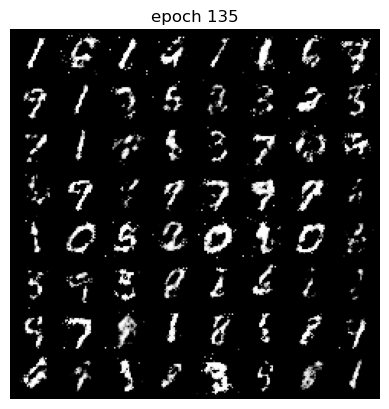

Epoch 135 of 200
Generator loss: 1.68989436, Discriminator loss: 0.92940497


118it [00:07, 15.38it/s]                         


Epoch 136 of 200
Generator loss: 1.56621892, Discriminator loss: 0.96398187


118it [00:07, 15.43it/s]                         


Epoch 137 of 200
Generator loss: 1.61664542, Discriminator loss: 0.95189496


118it [00:07, 15.48it/s]                         


Epoch 138 of 200
Generator loss: 1.62162055, Discriminator loss: 0.94501989


118it [00:07, 15.43it/s]                         


Epoch 139 of 200
Generator loss: 1.67349195, Discriminator loss: 0.93356493


118it [00:07, 15.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


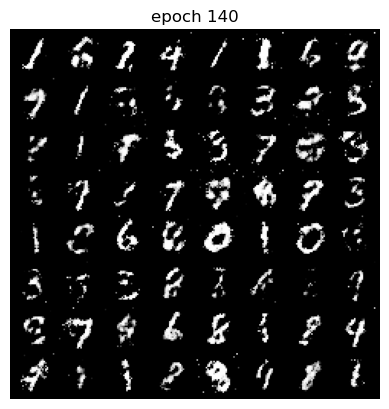

Epoch 140 of 200
Generator loss: 1.63624840, Discriminator loss: 0.93017162


118it [00:07, 15.49it/s]                         


Epoch 141 of 200
Generator loss: 1.66649941, Discriminator loss: 0.91818615


118it [00:07, 15.46it/s]                         


Epoch 142 of 200
Generator loss: 1.55189430, Discriminator loss: 0.94710210


118it [00:07, 15.57it/s]                         


Epoch 143 of 200
Generator loss: 1.60130052, Discriminator loss: 0.95352836


118it [00:07, 15.47it/s]                         


Epoch 144 of 200
Generator loss: 1.55297359, Discriminator loss: 0.97891299


118it [00:07, 15.34it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


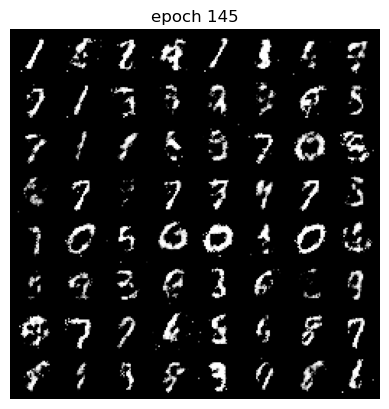

Epoch 145 of 200
Generator loss: 1.58445438, Discriminator loss: 0.95545749


118it [00:07, 15.40it/s]                         


Epoch 146 of 200
Generator loss: 1.62401137, Discriminator loss: 0.94081890


118it [00:07, 15.58it/s]                         


Epoch 147 of 200
Generator loss: 1.63898169, Discriminator loss: 0.91904346


118it [00:07, 15.44it/s]                         


Epoch 148 of 200
Generator loss: 1.58697523, Discriminator loss: 0.96117187


118it [00:07, 15.61it/s]                         


Epoch 149 of 200
Generator loss: 1.62807559, Discriminator loss: 0.93534127


118it [00:07, 15.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


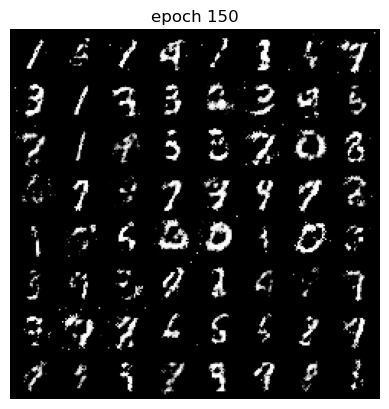

Epoch 150 of 200
Generator loss: 1.60165526, Discriminator loss: 0.96194787


118it [00:07, 15.30it/s]                         


Epoch 151 of 200
Generator loss: 1.56483922, Discriminator loss: 0.95920086


118it [00:07, 15.44it/s]                         


Epoch 152 of 200
Generator loss: 1.59906657, Discriminator loss: 0.93287713


118it [00:07, 15.55it/s]                         


Epoch 153 of 200
Generator loss: 1.62550439, Discriminator loss: 0.96867289


118it [00:07, 15.59it/s]                         


Epoch 154 of 200
Generator loss: 1.54448161, Discriminator loss: 0.97038058


118it [00:07, 15.44it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


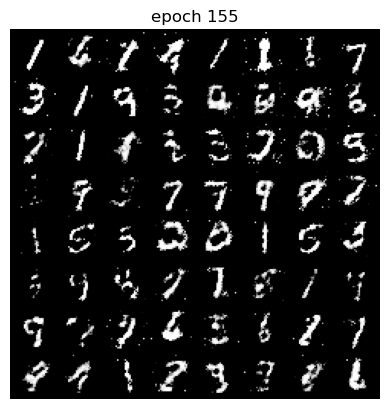

Epoch 155 of 200
Generator loss: 1.66550177, Discriminator loss: 0.94157660


118it [00:07, 15.48it/s]                         


Epoch 156 of 200
Generator loss: 1.51750783, Discriminator loss: 0.98229311


118it [00:07, 15.39it/s]                         


Epoch 157 of 200
Generator loss: 1.47934931, Discriminator loss: 0.97921953


118it [00:07, 15.71it/s]                         


Epoch 158 of 200
Generator loss: 1.50215385, Discriminator loss: 0.98114218


118it [00:07, 15.49it/s]                         


Epoch 159 of 200
Generator loss: 1.57088906, Discriminator loss: 0.96578346


118it [00:07, 15.51it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


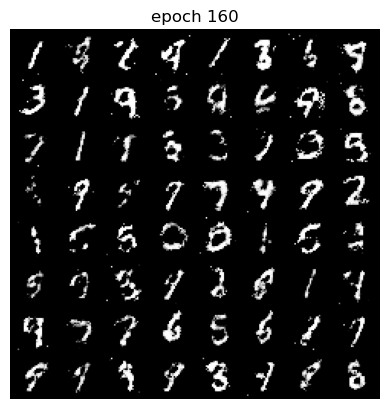

Epoch 160 of 200
Generator loss: 1.65115374, Discriminator loss: 0.94780703


118it [00:07, 15.30it/s]                         


Epoch 161 of 200
Generator loss: 1.47626284, Discriminator loss: 0.99232282


118it [00:07, 15.77it/s]                         


Epoch 162 of 200
Generator loss: 1.55277395, Discriminator loss: 0.97705971


118it [00:07, 15.26it/s]                         


Epoch 163 of 200
Generator loss: 1.62125616, Discriminator loss: 0.95464642


118it [00:07, 15.38it/s]                         


Epoch 164 of 200
Generator loss: 1.59394681, Discriminator loss: 0.94758871


118it [00:07, 15.54it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


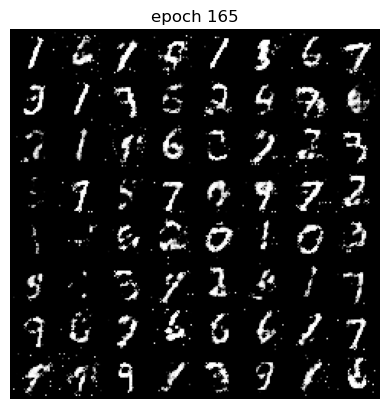

Epoch 165 of 200
Generator loss: 1.55026475, Discriminator loss: 0.96275300


118it [00:07, 15.59it/s]                         


Epoch 166 of 200
Generator loss: 1.58055908, Discriminator loss: 0.96147134


118it [00:07, 15.49it/s]                         


Epoch 167 of 200
Generator loss: 1.53304751, Discriminator loss: 0.96695892


118it [00:07, 15.74it/s]                         


Epoch 168 of 200
Generator loss: 1.48631353, Discriminator loss: 1.01067094


118it [00:07, 15.67it/s]                         


Epoch 169 of 200
Generator loss: 1.44970002, Discriminator loss: 1.01467233


118it [00:07, 15.55it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


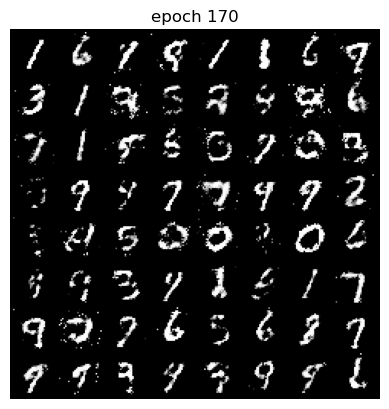

Epoch 170 of 200
Generator loss: 1.51411773, Discriminator loss: 0.98669256


118it [00:07, 15.82it/s]                         


Epoch 171 of 200
Generator loss: 1.46605873, Discriminator loss: 0.99769367


118it [00:07, 15.63it/s]                         


Epoch 172 of 200
Generator loss: 1.45548592, Discriminator loss: 1.00120192


118it [00:07, 15.59it/s]                         


Epoch 173 of 200
Generator loss: 1.48354013, Discriminator loss: 1.02211995


118it [00:07, 15.39it/s]                         


Epoch 174 of 200
Generator loss: 1.40861506, Discriminator loss: 1.01746547


118it [00:07, 15.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


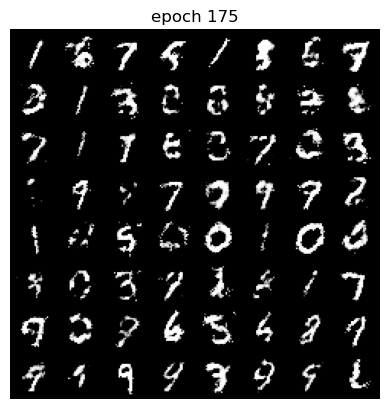

Epoch 175 of 200
Generator loss: 1.44971265, Discriminator loss: 1.00189662


118it [00:07, 15.63it/s]                         


Epoch 176 of 200
Generator loss: 1.50114728, Discriminator loss: 0.98514293


118it [00:07, 15.47it/s]                         


Epoch 177 of 200
Generator loss: 1.47147173, Discriminator loss: 1.00871686


118it [00:07, 15.71it/s]                         


Epoch 178 of 200
Generator loss: 1.42557953, Discriminator loss: 1.01173830


118it [00:07, 15.72it/s]                         


Epoch 179 of 200
Generator loss: 1.42544541, Discriminator loss: 1.02394310


118it [00:07, 15.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


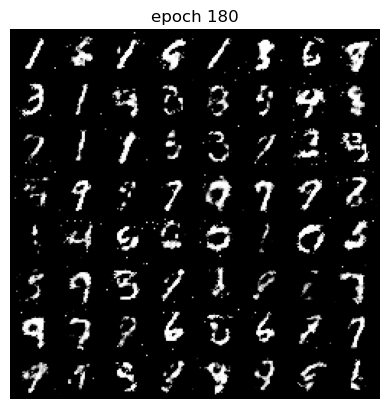

Epoch 180 of 200
Generator loss: 1.37695238, Discriminator loss: 1.05852465


118it [00:07, 15.34it/s]                         


Epoch 181 of 200
Generator loss: 1.36629990, Discriminator loss: 1.04017724


118it [00:07, 15.71it/s]                         


Epoch 182 of 200
Generator loss: 1.37971317, Discriminator loss: 1.04131727


118it [00:07, 15.91it/s]                         


Epoch 183 of 200
Generator loss: 1.32672404, Discriminator loss: 1.08609665


118it [00:07, 15.68it/s]                         


Epoch 184 of 200
Generator loss: 1.40871467, Discriminator loss: 1.03323345


118it [00:07, 15.91it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


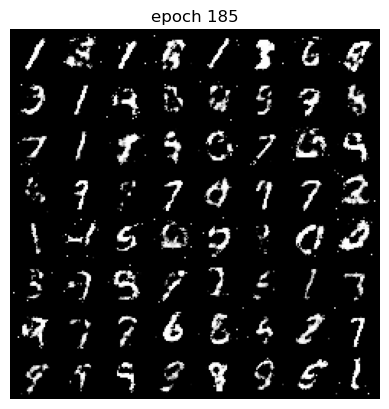

Epoch 185 of 200
Generator loss: 1.40964228, Discriminator loss: 1.03667063


118it [00:07, 15.83it/s]                         


Epoch 186 of 200
Generator loss: 1.41881347, Discriminator loss: 1.03146823


118it [00:07, 15.72it/s]                         


Epoch 187 of 200
Generator loss: 1.38529514, Discriminator loss: 1.02521221


118it [00:07, 15.87it/s]                         


Epoch 188 of 200
Generator loss: 1.34027478, Discriminator loss: 1.05396596


118it [00:07, 15.78it/s]                         


Epoch 189 of 200
Generator loss: 1.37647414, Discriminator loss: 1.05245546


118it [00:07, 15.79it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


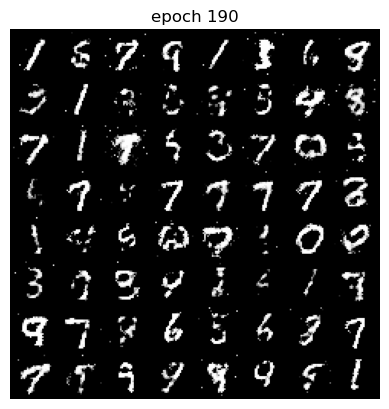

Epoch 190 of 200
Generator loss: 1.35852008, Discriminator loss: 1.05368349


118it [00:07, 15.88it/s]                         


Epoch 191 of 200
Generator loss: 1.32968931, Discriminator loss: 1.04752941


118it [00:07, 15.72it/s]                         


Epoch 192 of 200
Generator loss: 1.36634749, Discriminator loss: 1.06058101


118it [00:07, 15.86it/s]                         


Epoch 193 of 200
Generator loss: 1.31206531, Discriminator loss: 1.07345691


118it [00:07, 15.69it/s]                         


Epoch 194 of 200
Generator loss: 1.36449914, Discriminator loss: 1.05699151


118it [00:07, 15.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


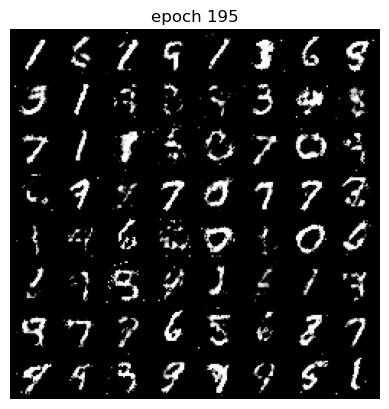

Epoch 195 of 200
Generator loss: 1.32607887, Discriminator loss: 1.07099752


118it [00:07, 15.65it/s]                         


Epoch 196 of 200
Generator loss: 1.29655900, Discriminator loss: 1.09118164


118it [00:07, 15.75it/s]                         


Epoch 197 of 200
Generator loss: 1.35255161, Discriminator loss: 1.03915521


118it [00:07, 15.66it/s]                         


Epoch 198 of 200
Generator loss: 1.30200804, Discriminator loss: 1.08845863


118it [00:07, 15.84it/s]                         


Epoch 199 of 200
Generator loss: 1.27776268, Discriminator loss: 1.08455617


118it [00:07, 15.76it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


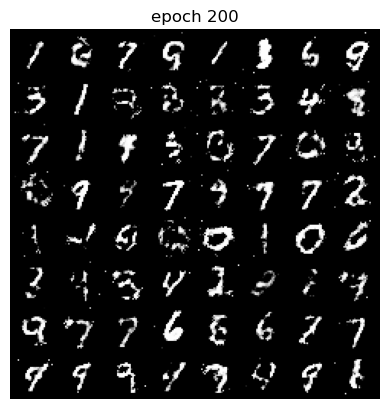

Epoch 200 of 200
Generator loss: 1.32240695, Discriminator loss: 1.06437732


In [14]:
torch.manual_seed(7777)

def generator_loss(data, true_label):
    ############ YOUR CODE HERE ##########
    m = len(data)
    gen_loss = 0
    gen_noise = create_noise(m, nz)

    gen_loss = criterion(discriminator(generator(gen_noise)), label_real(m)) #Part(a)

    return gen_loss
    
    ######################################
    
def discriminator_loss(data, true_label):
    ############ YOUR CODE HERE ##########
    m = len(data)
    disc_noise = create_noise(m, nz)

    error_real = criterion(discriminator(data), label_real(m))
    error_fake = criterion(discriminator(generator(disc_noise)), label_fake(m))

    disc_loss = error_fake + error_real
        
    return disc_loss
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        batch_data, batch_labels = data

        # perm = torch.randperm(len(batch_data))
        # idx = perm[:sample_size]
        # samples = batch_data[idx]
        # labels = batch_labels[idx]
        
        optim_d.zero_grad()
        loss_d_curr = discriminator_loss(batch_data, batch_labels)
        loss_d_curr.backward()
        optim_d.step()
        
        optim_g.zero_grad()
        loss_g_curr = generator_loss(batch_data, batch_labels)
        loss_g_curr.backward()
        optim_g.step()
        
        loss_d += loss_d_curr.item()
        loss_g += loss_g_curr.item() 
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

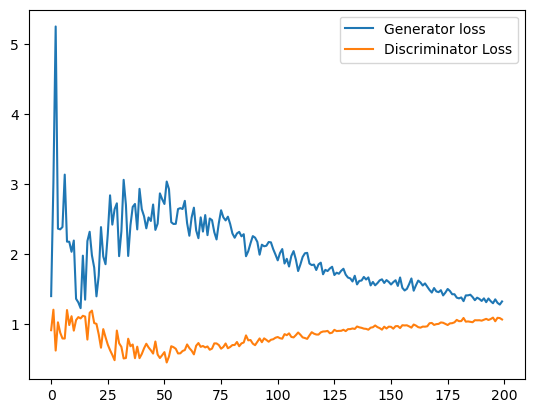

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')